In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('E:\\glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
#converting the data to array for plotting. 
X = np.array(df.iloc[:,3:5])
y = np.array(df['Type'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))

Shape of X:(214, 2)
Shape of y:(214,)


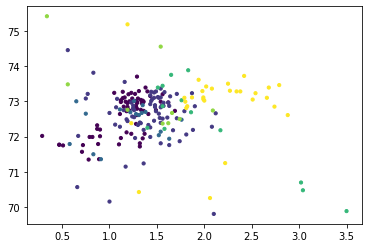

In [4]:
plt.scatter(X[:,0],X[:,1],c=y,s=10,label=y)
plt.show()

In [5]:
# Try plots using seaborn
#import seaborn as sns
#sns.swarmplot(x='Na',y='RI',data=df,hue='Type')

In [9]:
# creating training set, test set and checking shapes 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y)
print("Shape of X_Train:"+str(X_train.shape))
print("Shape of y_Train:"+str(Y_train.shape))
print("Shape of X_Test:"+str(X_test.shape))
print("Shape of y_Test:"+str(Y_test.shape))

Shape of X_Train:(160, 2)
Shape of y_Train:(160,)
Shape of X_Test:(54, 2)
Shape of y_Test:(54,)


In [10]:
# Using KNN to classify the glasses 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
# Predicting results using KNN fit. 
pred = knn.predict(X_train)
pred

array([2, 2, 7, 2, 7, 7, 1, 7, 1, 2, 3, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 7, 1, 2, 1, 2, 7, 1, 1, 1, 2, 7, 2, 2, 7,
       1, 1, 2, 1, 2, 5, 2, 1, 1, 7, 2, 2, 7, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       3, 3, 3, 2, 2, 1, 7, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 3, 1,
       2, 1, 1, 1, 1, 2, 1, 7, 2, 1, 1, 2, 7, 7, 3, 3, 7, 3, 2, 1, 2, 5,
       1, 2, 2, 1, 1, 1, 7, 2, 7, 7, 2, 7, 1, 2, 7, 2, 7, 1, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 2, 1, 7, 2, 2, 6, 1, 2, 1, 1, 6, 1, 2, 1, 1, 2, 2,
       1, 1, 7, 2, 2, 1], dtype=int64)

In [12]:
# Check accuracy
accuracy = knn.score(X_train,Y_train)
print("The accuracy is :"+str(accuracy))

The accuracy is :0.75625


[[47  5  2  0  0  0]
 [10 44  0  0  0  1]
 [ 4  3  6  0  0  0]
 [ 1  3  0  2  0  1]
 [ 1  3  0  0  2  1]
 [ 1  3  0  0  0 20]]


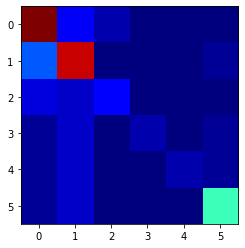

In [14]:
#computing confusion matrix 
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_train,pred)
print(cnf_matrix)

#plotting the matrix in with plotly
plt.imshow(cnf_matrix,cmap=plt.cm.jet)

<AxesSubplot:>

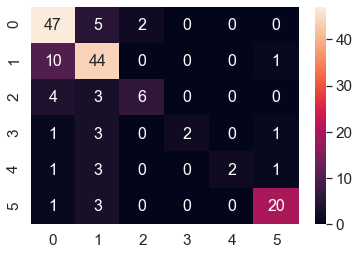

In [16]:
#visualizing the confusion matrix
import seaborn as sns
df_cm = pd.DataFrame(cnf_matrix, range(6),range(6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

<ipython-input-19-6fcf403b4496>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z)
<ipython-input-19-6fcf403b4496>:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z)


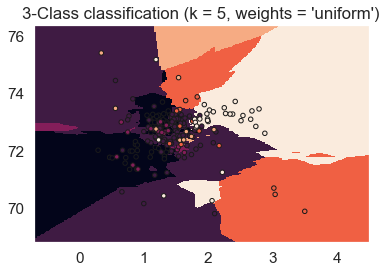

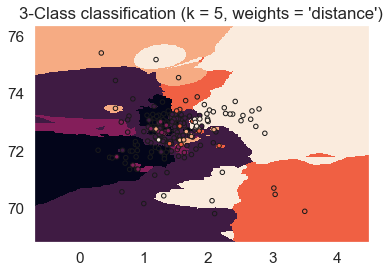

In [19]:
h = .02  # step size in the mesh
n_neighbors = 5 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   # ravel to flatten the into 1D and c_ to concatenate 

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"% (n_neighbors, weights))

plt.show()